In [23]:
import pandas
from pandas_datareader import DataReader
from datetime import datetime

# FB has changed to META since the recording of the tutorial
stocks_list = ["META",
              "AMZN",
              "NFLX",
              "GOOG"]

start = datetime(datetime.now().year - 1, 
                 datetime.now().month, 
                 datetime.now().day)

end = datetime.now()


for stock in stocks_list:
    # The tutorial used Yahoo, but Yahoo changed their API so I switched to "stooq"
    # https://stackoverflow.com/questions/74862453/why-am-i-getting-a-typeerror-string-indices-must-be-integer-message-when-tryi
    globals()[stock] = DataReader(stock, "stooq", start, end).iloc[::-1]
    

In [24]:
META.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,180.229261,183.519724,177.936124,180.786474,3.223162e+07
std,57.881270,58.482155,57.444979,58.088032,2.203316e+07
min,90.080000,90.457600,88.090000,88.910000,8.629269e+06
25%,132.910000,136.885000,131.580000,133.340000,2.089542e+07
50%,169.000000,172.320000,167.280000,169.580000,2.616363e+07
75%,215.157500,217.135000,213.170000,215.900000,3.528435e+07
max,313.620000,318.680000,310.520000,316.010000,2.323166e+08


In [25]:
print(AMZN)

               Open      High       Low   Close    Volume
Date                                                     
2022-07-21  123.200  124.8500  121.2600  124.63  60239892
2022-07-22  125.010  125.5000  121.3504  122.42  51463797
2022-07-25  122.695  123.6400  120.0300  121.14  50221259
2022-07-26  115.790  118.1500  114.5300  114.81  67075064
2022-07-27  117.310  121.9000  117.1600  120.97  61582015
...             ...       ...       ...     ...       ...
2023-07-14  134.060  136.6500  134.0600  134.68  54487090
2023-07-17  134.560  135.6200  133.2100  133.56  48450198
2023-07-18  132.710  133.8600  131.3550  132.83  54969133
2023-07-19  133.390  135.9900  132.5300  135.36  54531037
2023-07-20  134.070  134.7915  129.3300  129.96  59820579

[251 rows x 5 columns]


In [26]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-21 to 2023-07-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Close   251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


<Axes: xlabel='Date'>

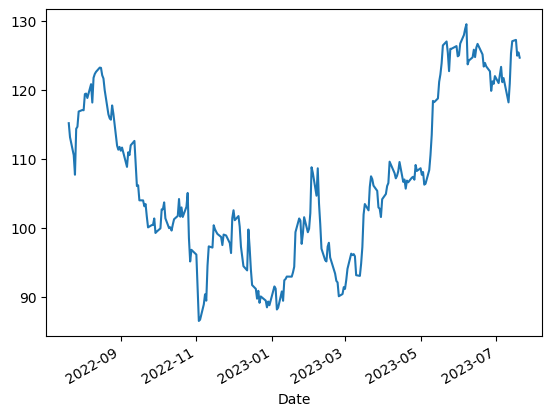

In [27]:
GOOG["High"].plot()

<Axes: xlabel='Date'>

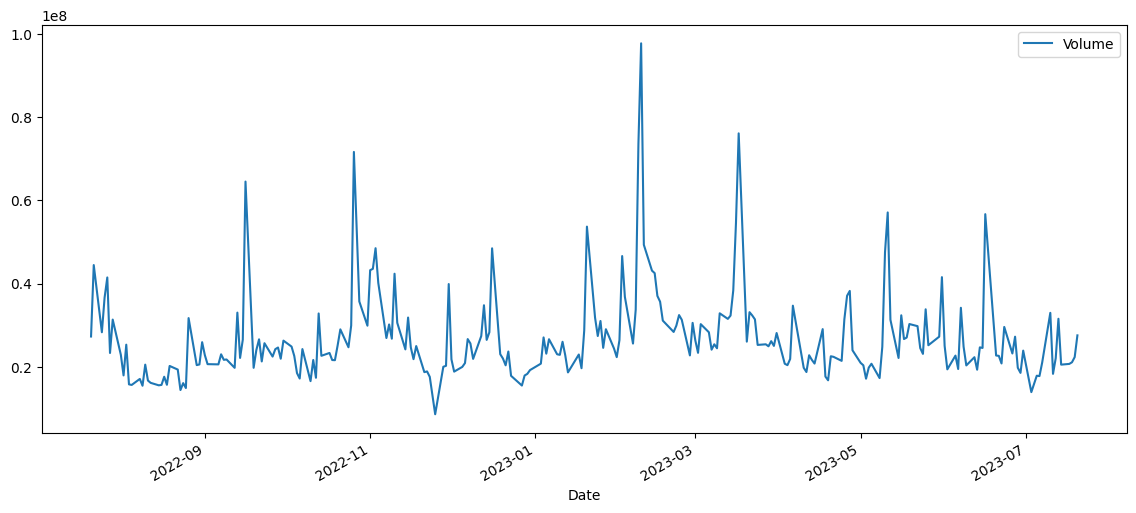

In [28]:
GOOG["Volume"].plot(legend = True,
                   figsize = (14,6))

<Axes: xlabel='Date'>

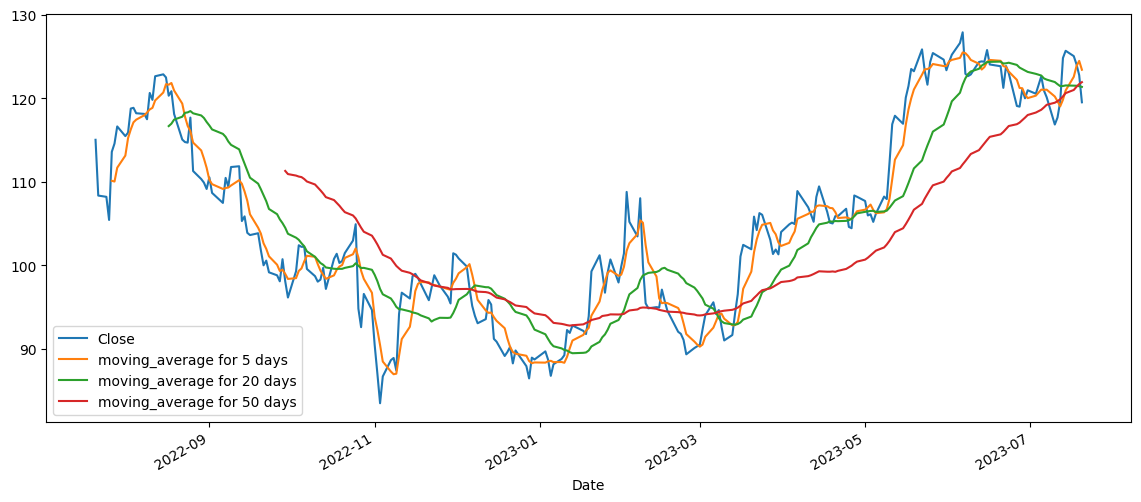

In [29]:
moving_average_intervals = [5, 20, 50]
for moving_average in moving_average_intervals:

    column_name = "moving_average for %s days" %(str(moving_average))

    GOOG[column_name] = GOOG["Close"].rolling(moving_average).mean()

GOOG[["Close", 
      "moving_average for 5 days",
      "moving_average for 20 days",
      "moving_average for 50 days"]].plot(figsize=(14, 6))


<Axes: xlabel='Date'>

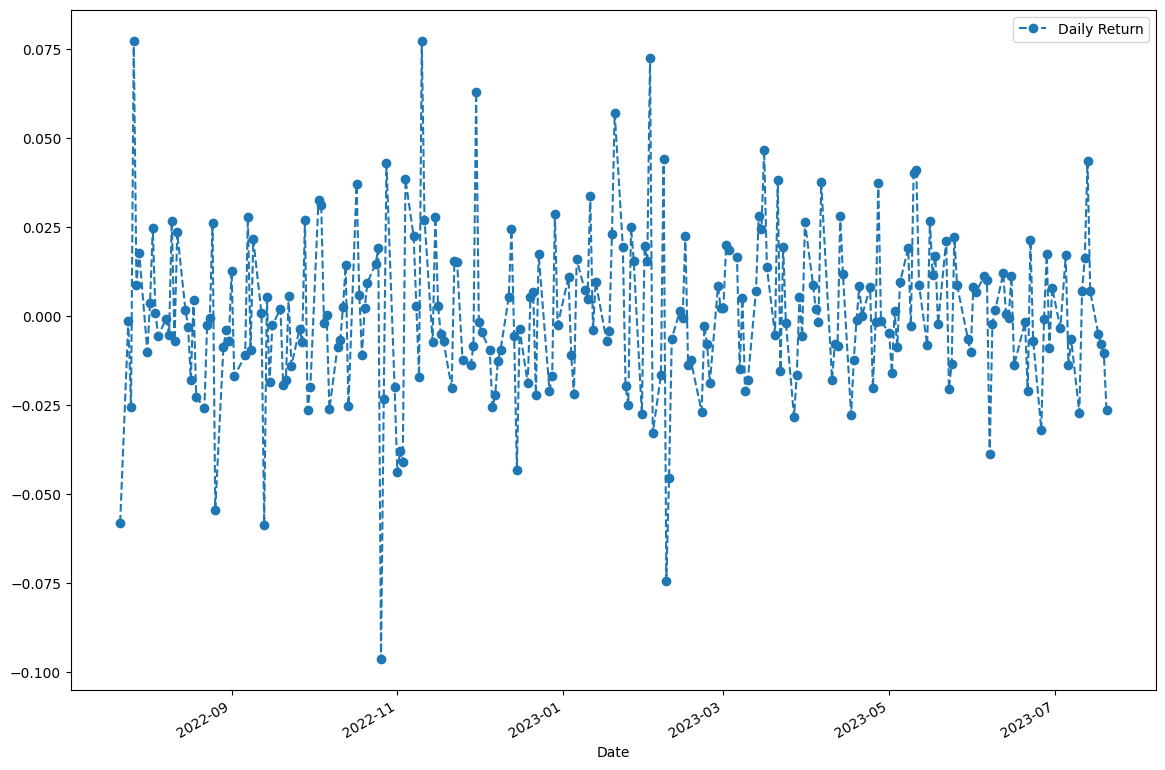

In [37]:
GOOG["Daily Return"] = GOOG["Close"].pct_change()

GOOG["Daily Return"].plot(figsize = (14,10),
                         legend = True,
                         linestyle = "--",
                         marker = "o")

In [40]:
adjusted_closing_dataframe=DataReader(stocks_list,
          "stooq",
          start,
          end)["Close"].iloc[::-1]

In [41]:
adjusted_closing_dataframe

Symbols,META,AMZN,NFLX,GOOG
Date,,,,
2022-07-21,183.17,124.63,223.88,115.04
2022-07-22,169.27,122.42,220.44,108.36
2022-07-25,166.65,121.14,218.51,108.21
2022-07-26,159.15,114.81,213.91,105.44
2022-07-27,169.58,120.97,226.75,113.60
...,...,...,...,...
2023-07-14,308.87,134.68,441.91,125.70
2023-07-17,310.62,133.56,450.05,125.06
2023-07-18,312.05,132.83,474.80,124.08


In [42]:
adjusted_closing_dataframe.head()

Symbols,META,AMZN,NFLX,GOOG
Date,,,,
2022-07-21,183.17,124.63,223.88,115.04
2022-07-22,169.27,122.42,220.44,108.36
2022-07-25,166.65,121.14,218.51,108.21
2022-07-26,159.15,114.81,213.91,105.44
2022-07-27,169.58,120.97,226.75,113.60


In [48]:
stocks_returns = adjusted_closing_dataframe.pct_change()
print(stocks_returns)

Symbols         META      AMZN      NFLX      GOOG
Date                                              
2022-07-21       NaN       NaN       NaN       NaN
2022-07-22 -0.075886 -0.017732 -0.015365 -0.058067
2022-07-25 -0.015478 -0.010456 -0.008755 -0.001384
2022-07-26 -0.045005 -0.052254 -0.021052 -0.025598
2022-07-27  0.065536  0.053654  0.060025  0.077390
...              ...       ...       ...       ...
2023-07-14 -0.014486  0.002829 -0.018806  0.006969
2023-07-17  0.005666 -0.008316  0.018420 -0.005091
2023-07-18  0.004604 -0.005466  0.054994 -0.007836
2023-07-19  0.012690  0.019047  0.005876 -0.010477
2023-07-20 -0.042689 -0.039894 -0.084110 -0.026470

[251 rows x 4 columns]


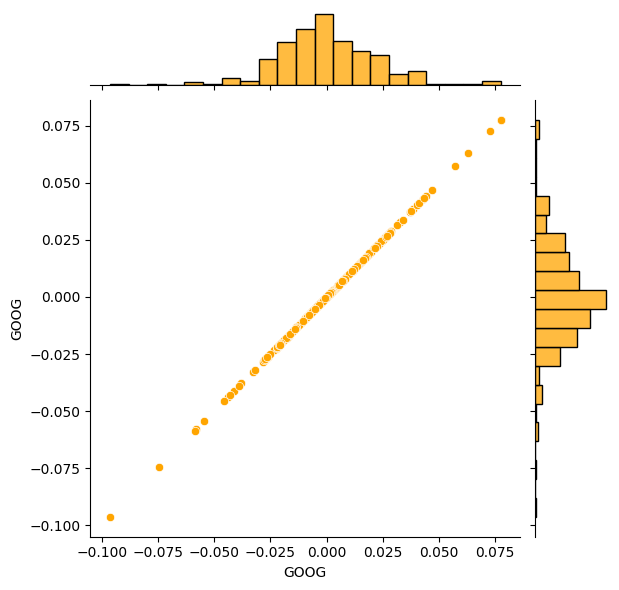

In [53]:
import seaborn

seaborn.jointplot(x = "GOOG",
                  y =  "GOOG",
                  data = stocks_returns,
                  color = "orange")

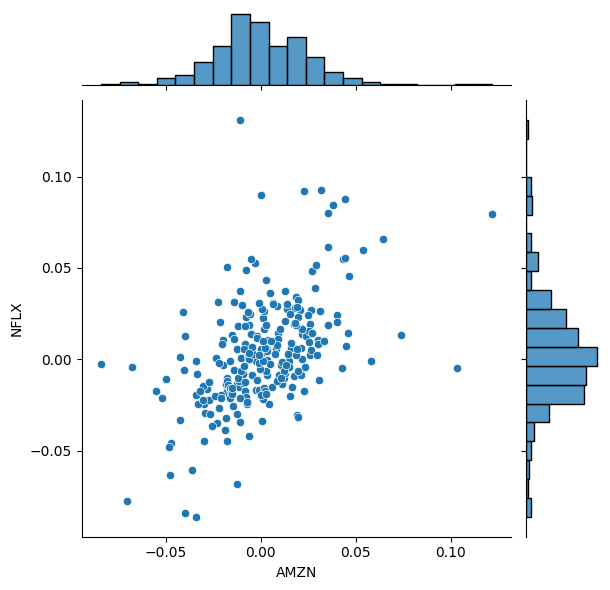

In [54]:
seaborn.jointplot(x = "AMZN",
                 y = "NFLX",
                 data = stocks_returns)

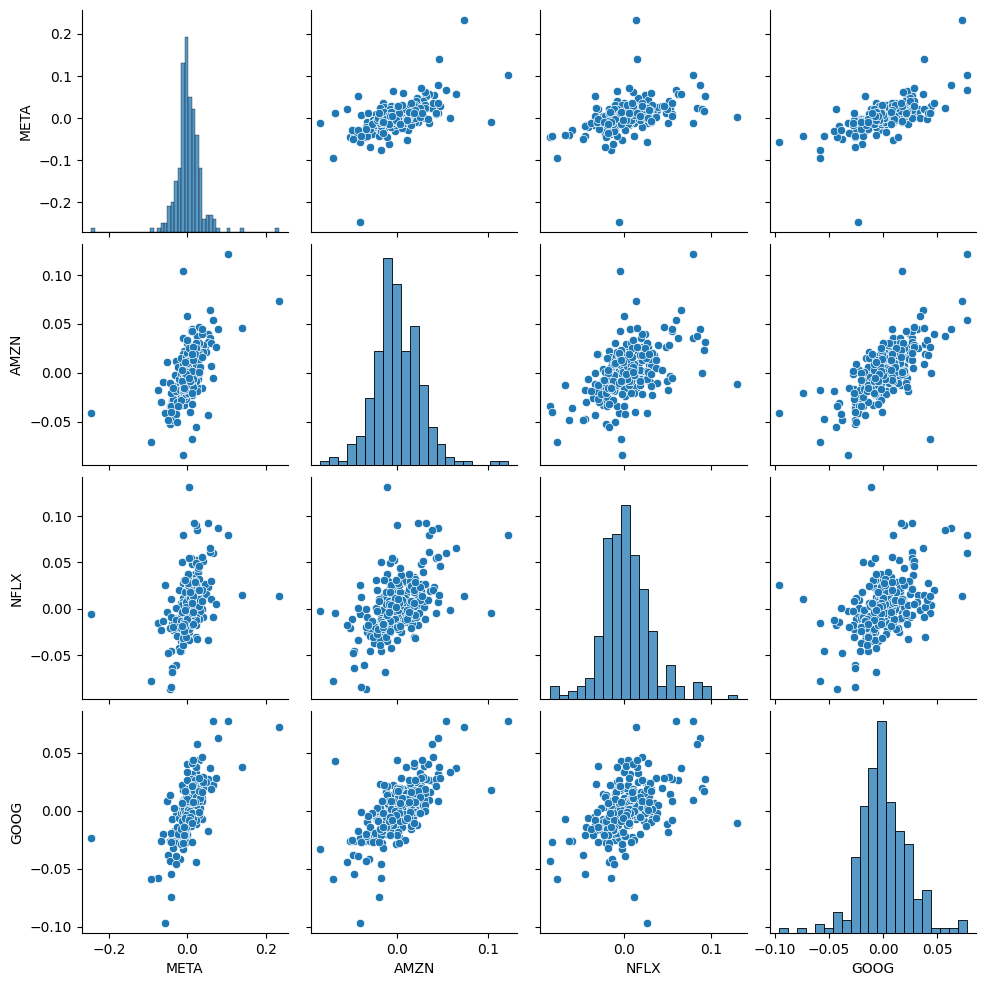

In [56]:
seaborn.pairplot(data = stocks_returns.dropna())